In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To show plots in the notebook
%matplotlib inline


In [2]:
# Load your CSV file
df = pd.read_csv("COVID-19 Dataset.csv")

# Display first few rows
df.head()


,Confirmed,Recovered,Deaths/Day
0,555,28,3.06
1,654,30,2.75
2,941,36,2.76
3,1434,39,2.93
4,2118,52,2.64


In [3]:
# Show column names and info
print("Columns:", df.columns.tolist())
df.info()


Columns: ['Confirmed', 'Recovered', 'Deaths/Day']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Confirmed   188 non-null    int64  
 1   Recovered   188 non-null    int64  
 2   Deaths/Day  188 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 4.5 KB


In [4]:
# Rename 'Deaths/Day' for simplicity
df.rename(columns={'Deaths/Day': 'Deaths'}, inplace=True)

# Add a 'Date' column (assuming each row is one day from Jan 1, 2020)
df['Date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='D')

# View updated DataFrame
df.head()


,Confirmed,Recovered,Deaths,Date
0,555,28,3.06,2020-01-01
1,654,30,2.75,2020-01-02
2,941,36,2.76,2020-01-03
3,1434,39,2.93,2020-01-04
4,2118,52,2.64,2020-01-05


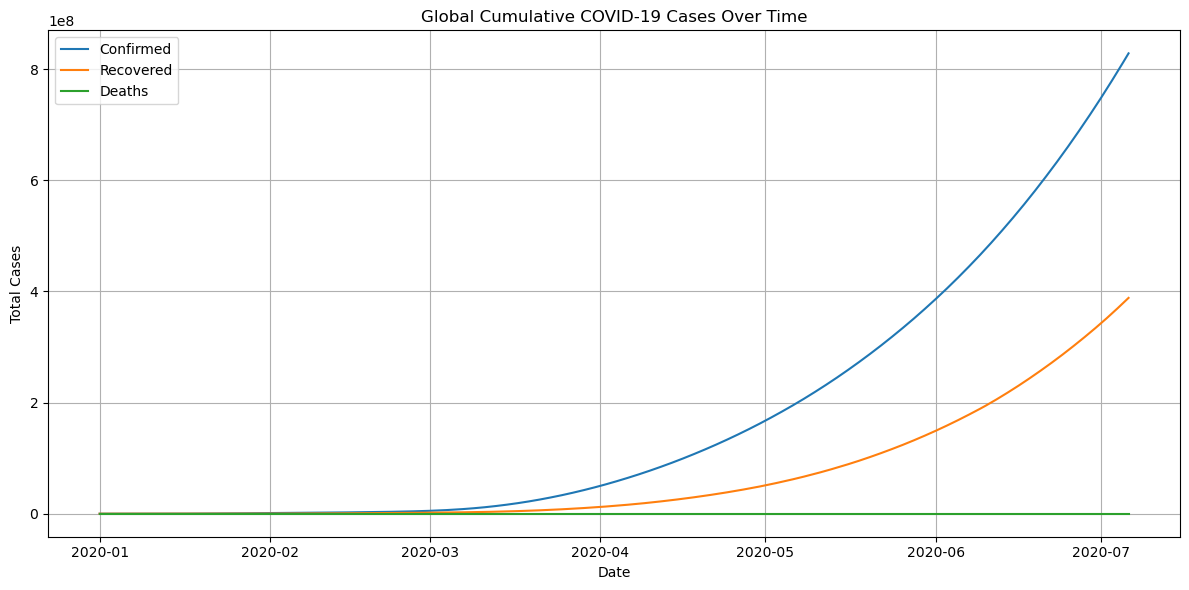

In [5]:
# Plot cumulative totals
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Confirmed'].cumsum(), label='Confirmed')
plt.plot(df['Date'], df['Recovered'].cumsum(), label='Recovered')
plt.plot(df['Date'], df['Deaths'].cumsum(), label='Deaths')
plt.title('Global Cumulative COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


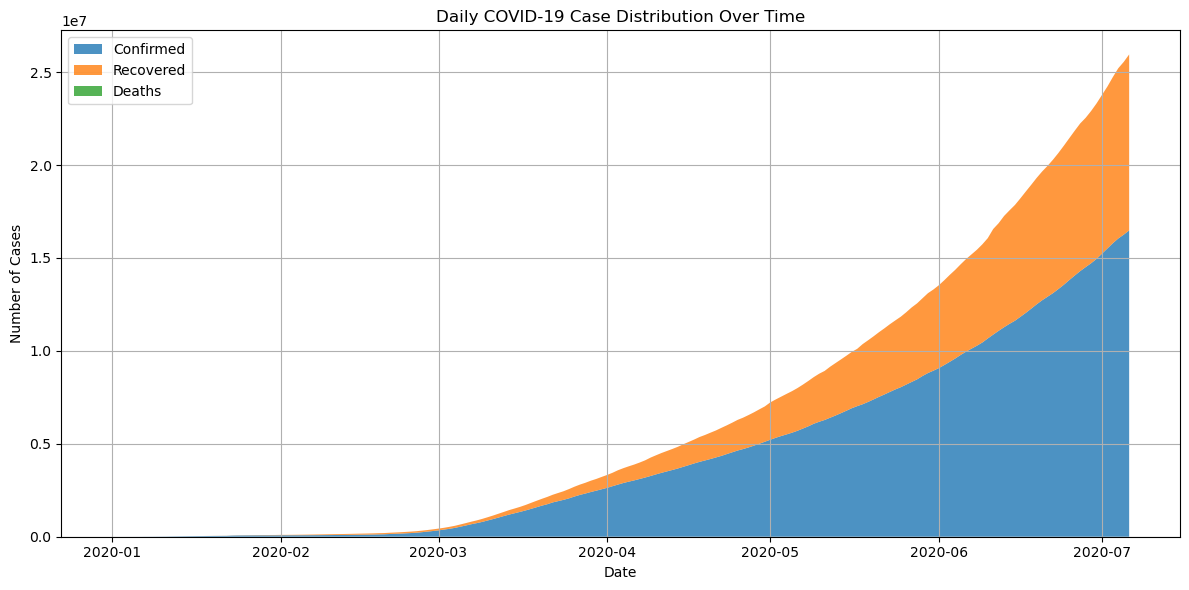

In [6]:
# Area Chart
plt.figure(figsize=(12, 6))
plt.stackplot(df['Date'], df['Confirmed'], df['Recovered'], df['Deaths'],
              labels=['Confirmed', 'Recovered', 'Deaths'], alpha=0.8)
plt.title('Daily COVID-19 Case Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


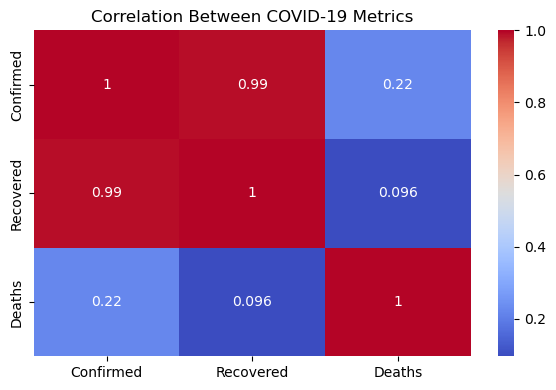

In [7]:
# Heatmap of correlations
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Confirmed', 'Recovered', 'Deaths']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between COVID-19 Metrics')
plt.tight_layout()
plt.show()
